<a href="https://colab.research.google.com/github/TastyButSadly/Notebooks/blob/main/hw_3_1_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MEow MePhi presents:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# !pip install -U pandas-profiling

## Загрузка данных


In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 9.49MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 5.92MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 41.3MB/s]


In [ ]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2162,72,118.20,8547.15,Male,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0
4065,72,81.00,5750,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),0
1861,51,81.15,4126.2,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),0
4189,62,106.05,6703.5,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0
2857,17,90.95,1612.2,Male,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),0


In [ ]:
data = data.replace(' ', np.nan)
data = data.replace('', np.nan)

test = test.replace(' ', np.nan)
test = test.replace('', np.nan)

data.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [ ]:
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


ClientPeriod - Период клиента

MonthlySpending - Ежемесячные расходы

TotalSpent - Всего потрачено

Sex - Пол

IsSeniorCitizen - Является пенсионером

HasPartner - Есть партнер

HasChild - Есть дети

HasPhoneService - Подключена телефонная услуга

HasMultiplePhoneNumbers - Есть несколько телефонных номеров

HasInternetService - Подключена интернет-услуга

HasOnlineSecurityService - Есть услуга онлайн-безопасности

HasOnlineBackup - Есть онлайн-резервное копирование

HasDeviceProtection - Есть защита устройства

HasTechSupportAccess - Есть доступ к технической поддержке

HasOnlineTV - Есть онлайн-телевидение

HasMovieSubscription - Есть подписка на фильмы

HasContractPhone - Есть контракт на телефон

IsBillingPaperless - Безбумажный биллинг

PaymentMethod - Способ оплаты

Churn - Отток клиентов

In [ ]:
data.dtypes

,0
ClientPeriod,int64
MonthlySpending,float64
TotalSpent,object
Sex,object
IsSeniorCitizen,int64
HasPartner,object
HasChild,object
HasPhoneService,object
HasMultiplePhoneNumbers,object
HasInternetService,object


In [ ]:
data.TotalSpent = data.TotalSpent.astype('float')
test.TotalSpent = test.TotalSpent.astype('float')

In [ ]:
data.drop_duplicates()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [ ]:
# data.dropna(inplace=True)
# data.reset_index(inplace=True, drop=True)

## Анализ данных


**Категориальные признаки**

In [ ]:
for feature in cat_cols:
  print(data[feature].value_counts(), '\n')

Sex
Male      2655
Female    2627
Name: count, dtype: int64 

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64 

HasPartner
No     2705
Yes    2577
Name: count, dtype: int64 

HasChild
No     3676
Yes    1606
Name: count, dtype: int64 

HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64 

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64 

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64 

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64 

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64 

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64 

HasTechSupportAccess
No                     2604
Ye

In [ ]:
# for col in cat_cols:
#     counts = data[col].value_counts()
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#     axes[0].bar(counts.index, counts.values, edgecolor='black')
#     axes[0].set_title(f'Bar {col}')
#     axes[0].tick_params(axis='x', rotation=45)

#     axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
#     axes[1].set_title(f'Pie {col}')

#     plt.show()

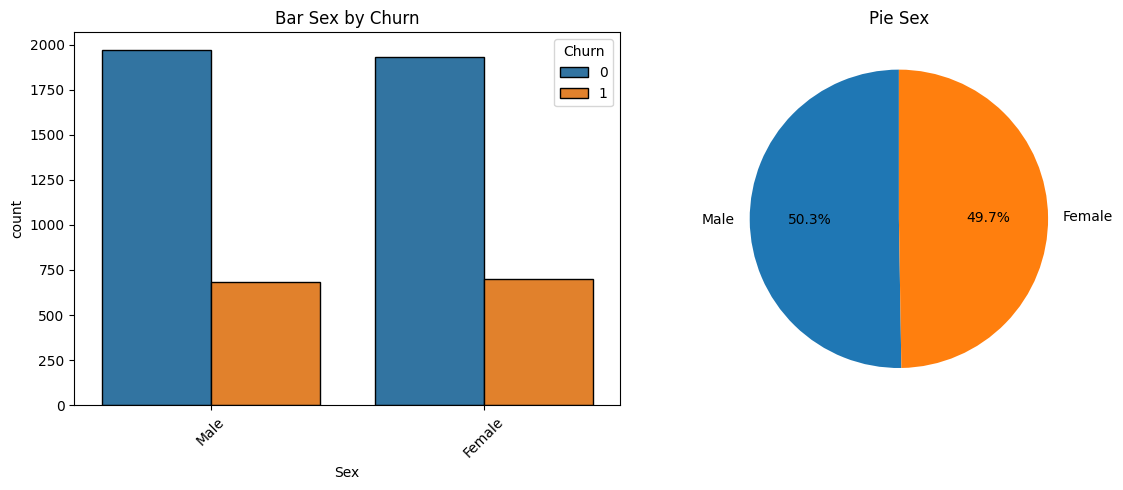

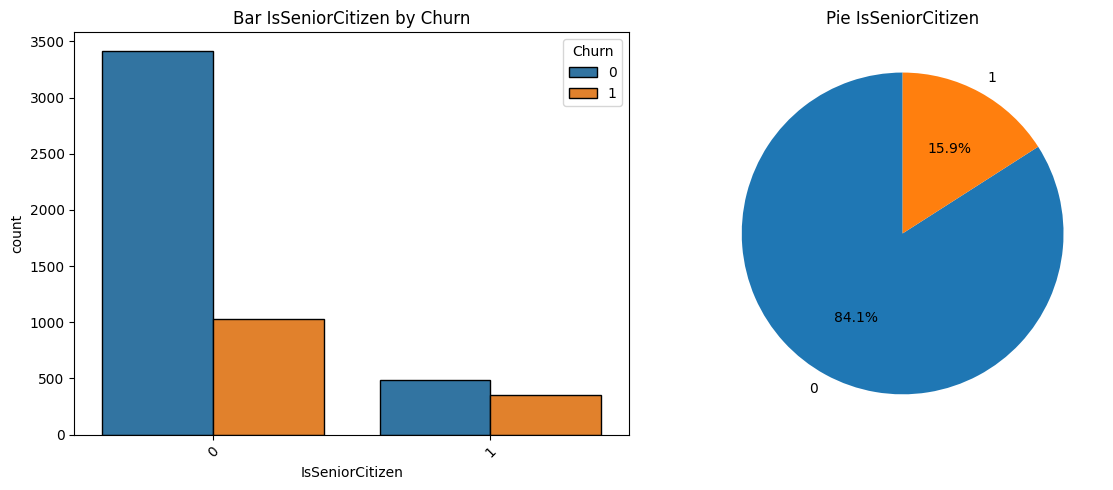

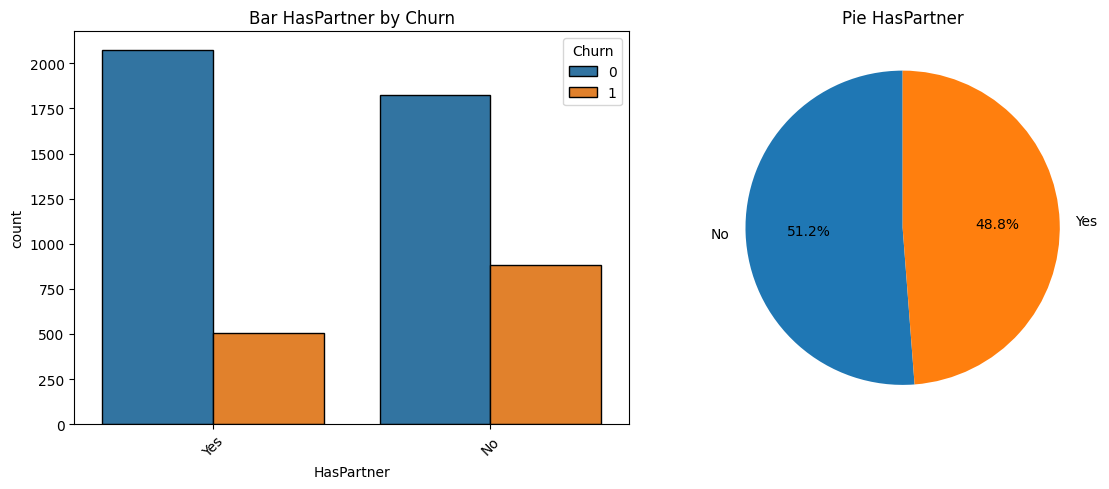

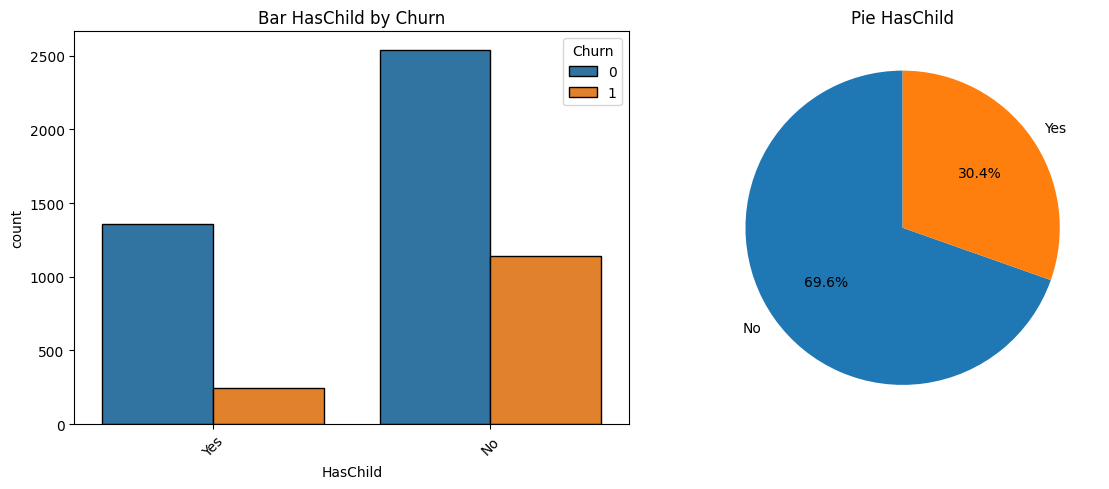

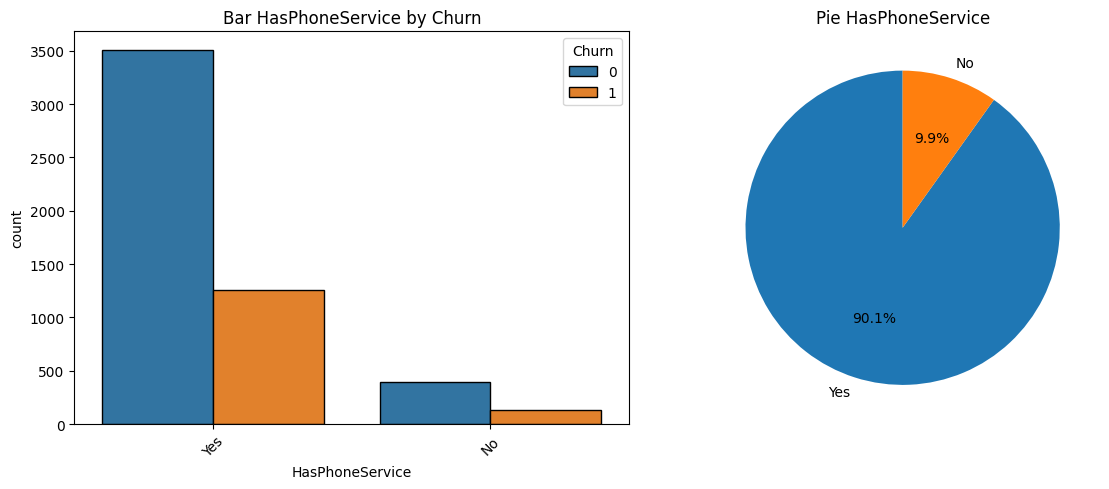

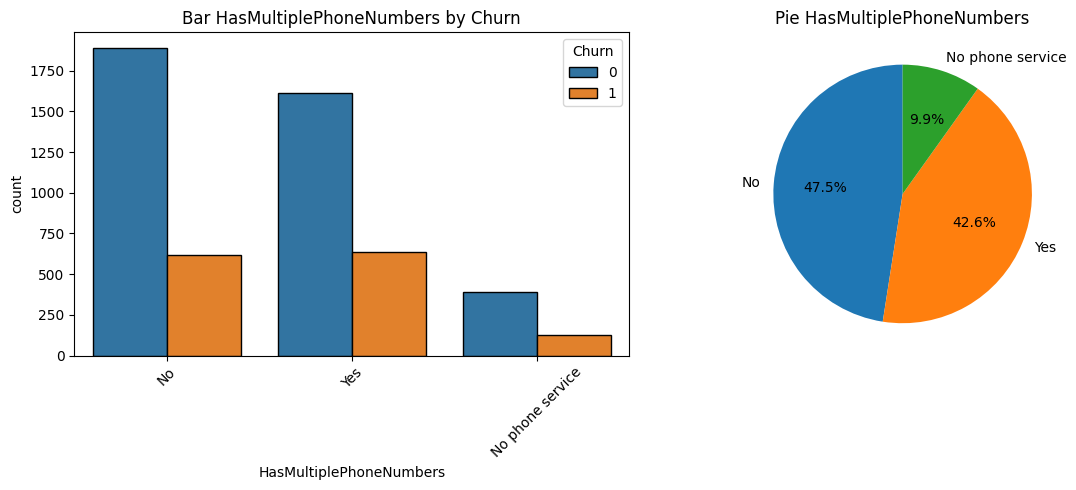

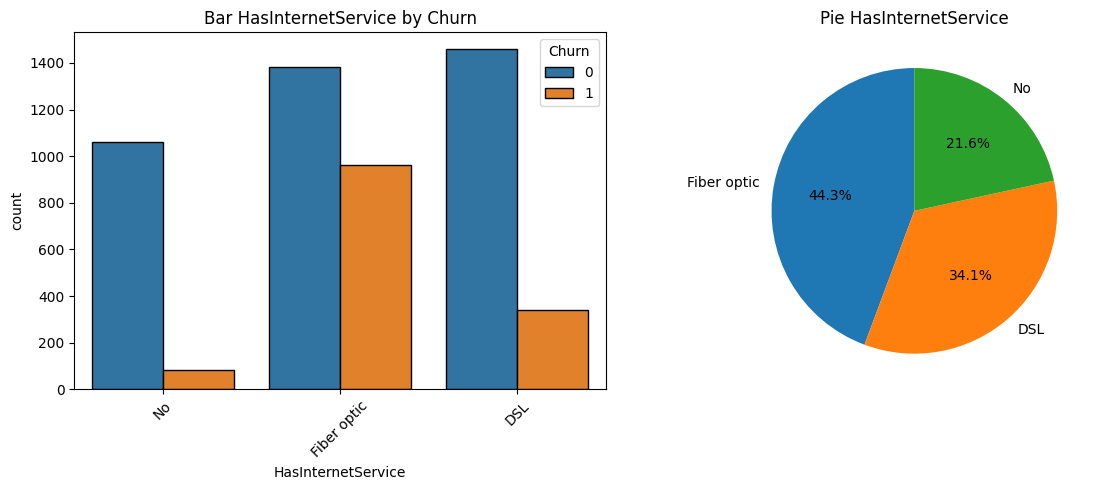

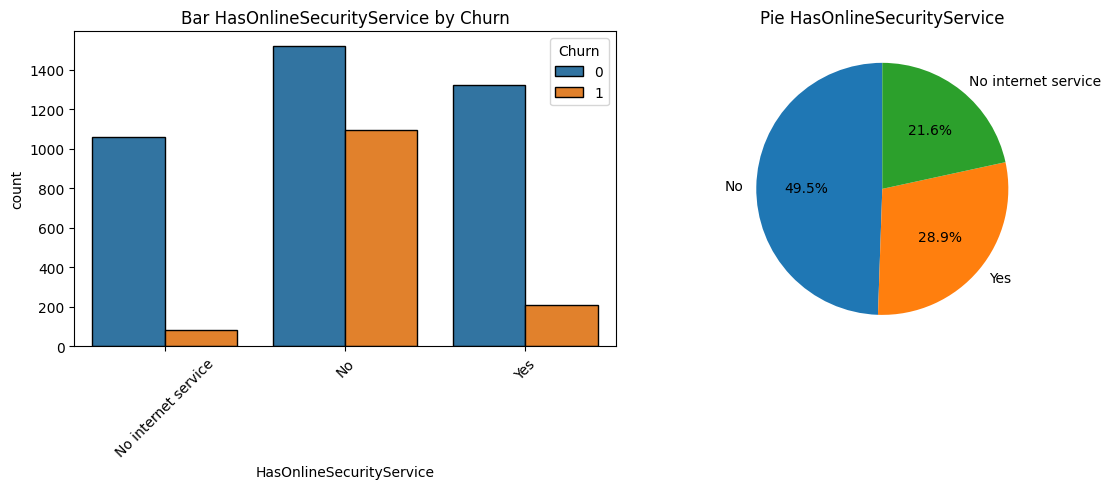

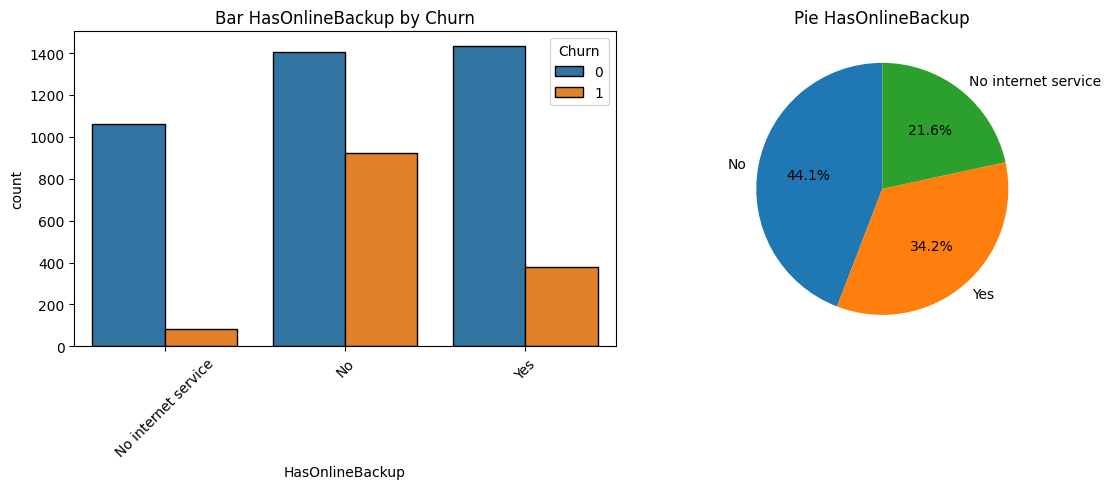

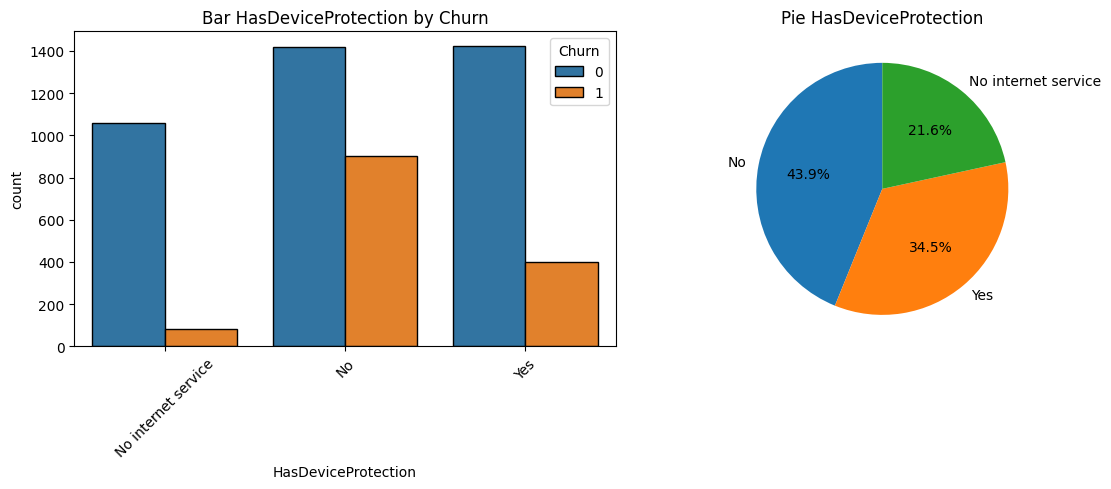

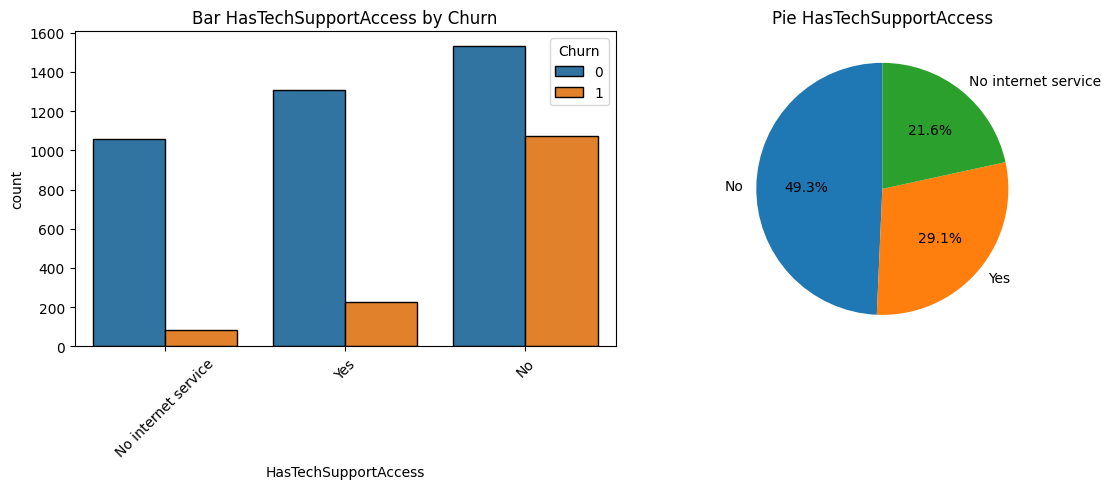

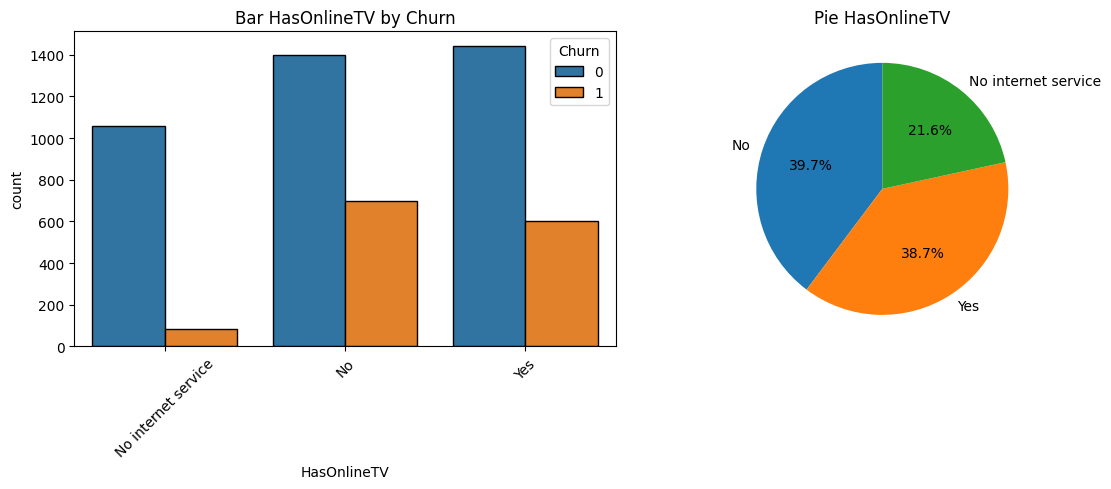

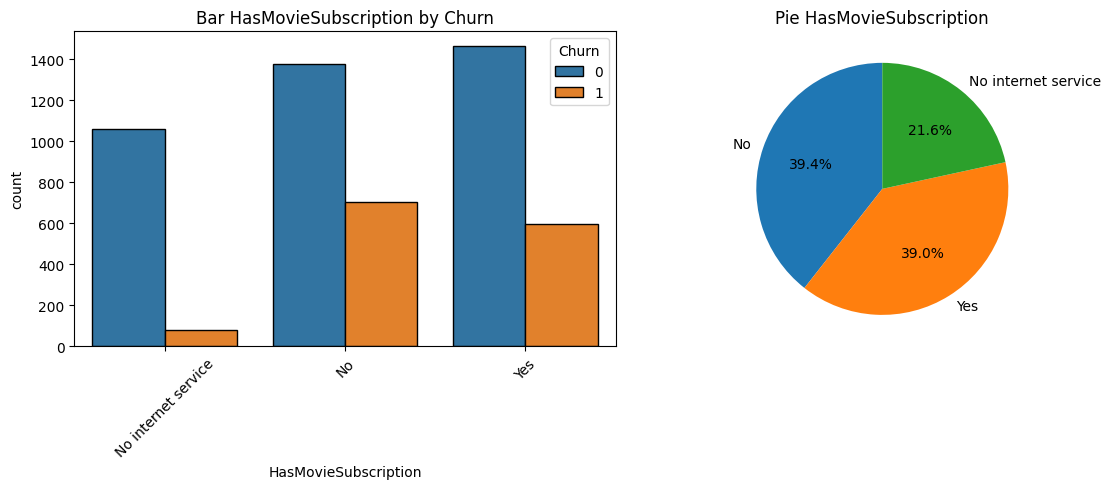

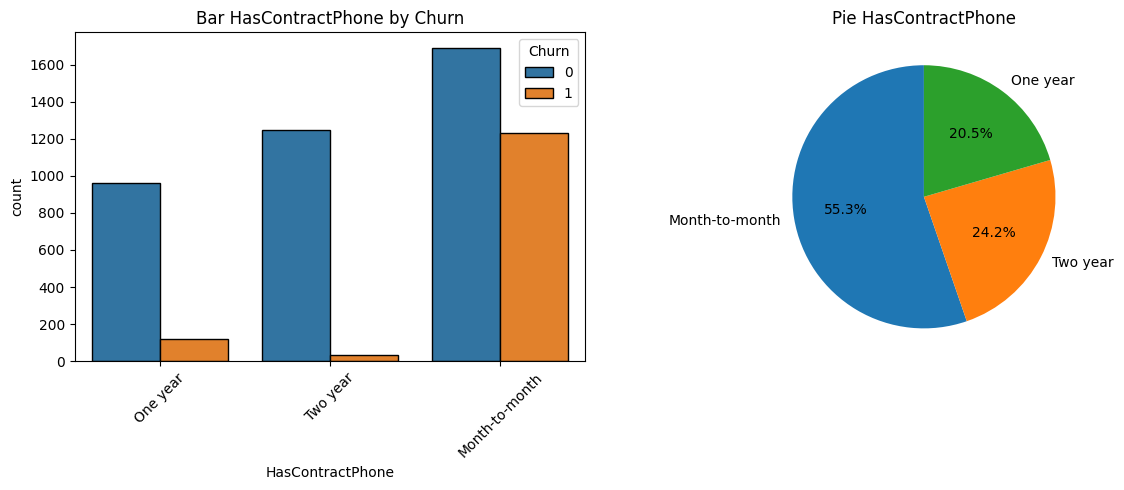

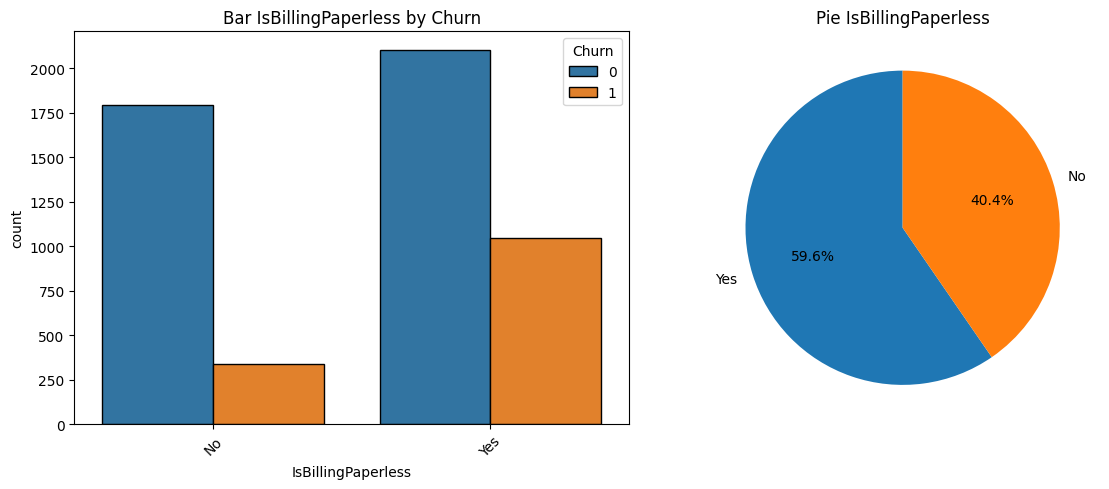

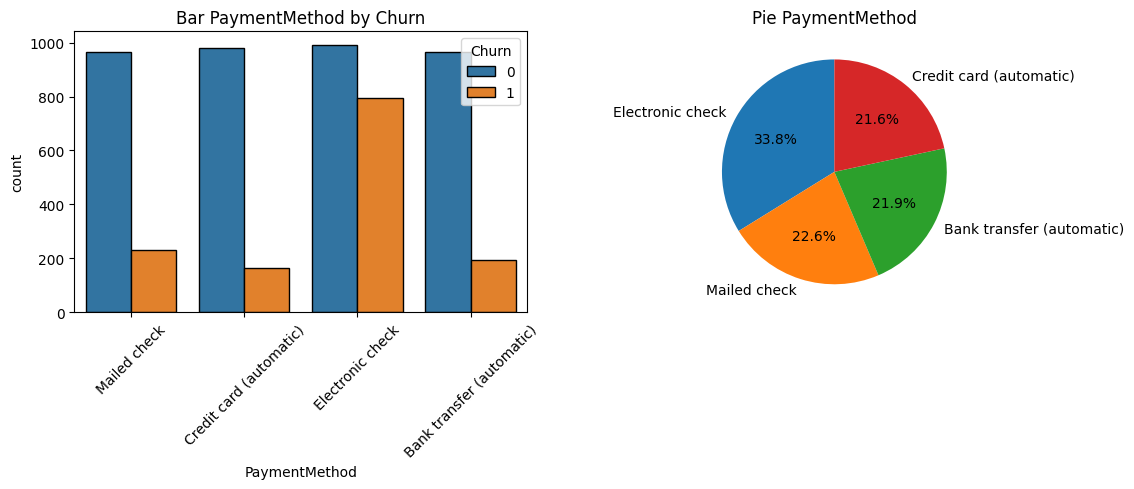

In [ ]:
for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.countplot(x=col, hue='Churn', data=data, ax=axes[0], edgecolor='black')
    axes[0].set_title(f'Bar {col} by Churn')
    axes[0].tick_params(axis='x', rotation=45)

    counts = data[col].value_counts()
    axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Pie {col}')

    plt.tight_layout()
    plt.show()

**Численные признаки**

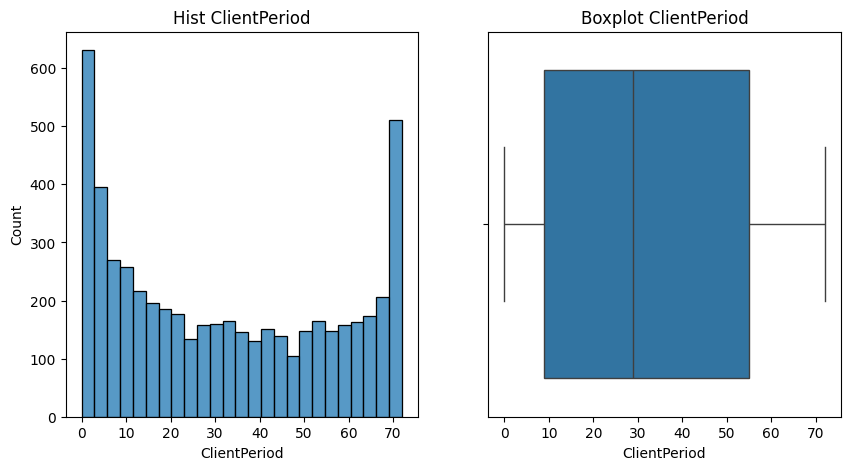

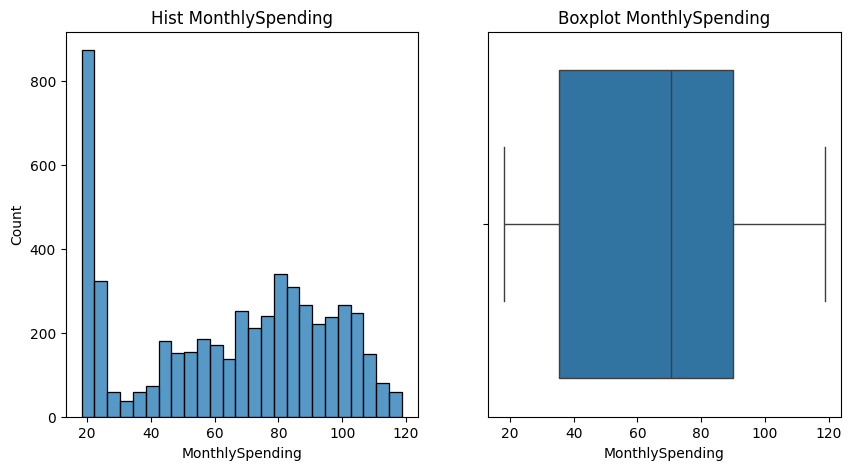

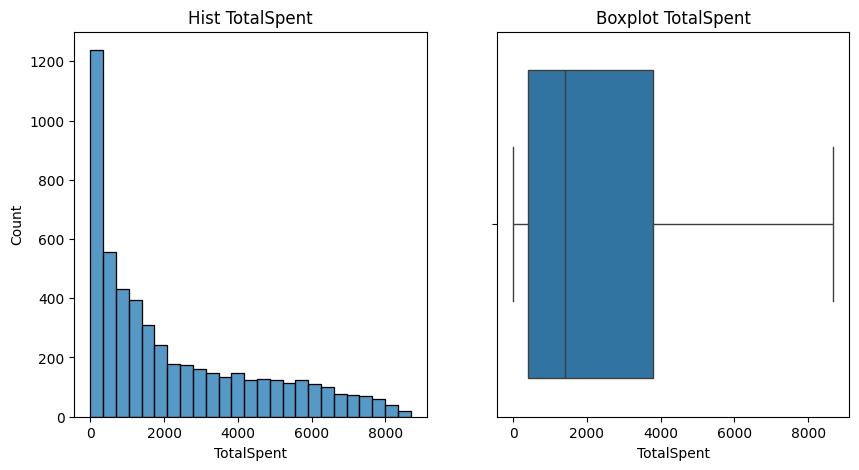

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.histplot(data[col], bins=25, kde=False, ax=axes[0], edgecolor='black')
    axes[0].set_title(f'Hist {col}')

    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f'Boxplot {col}')

    plt.show()

Видим, что
- есть всплекс количества пользователей, которые пользовались сервисом очень мало и около 70 дней
- большинство пользователей тратит минимальное количество денег как в месяц, так и вообще

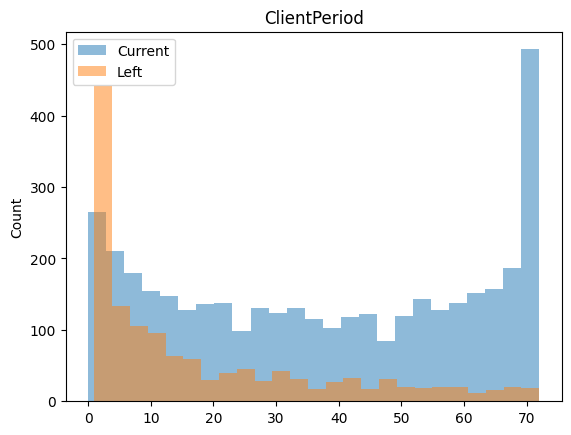

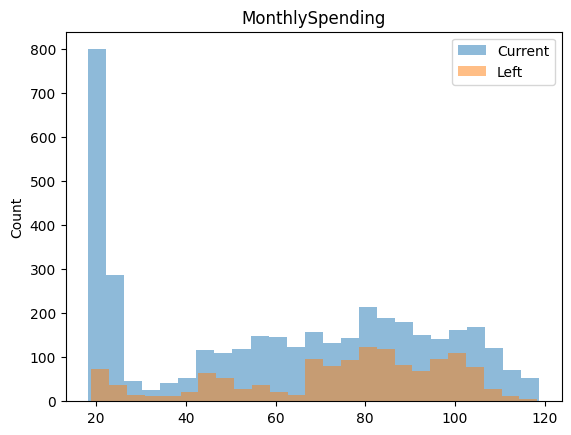

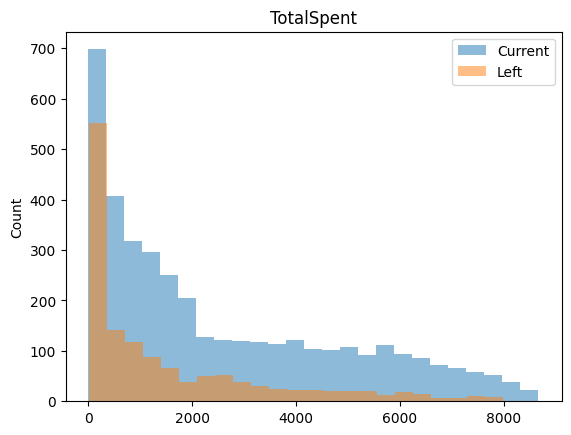

In [ ]:
for col in num_cols:
  data.groupby('Churn')[col].plot(kind='hist', bins=25, alpha=0.5)
  plt.legend(['Current', 'Left'])
  plt.ylabel('Count')
  plt.title(col)
  plt.show()

Видно, что оставшиеся клиенты тратят и в месяц и вообще больше, чем ушешие

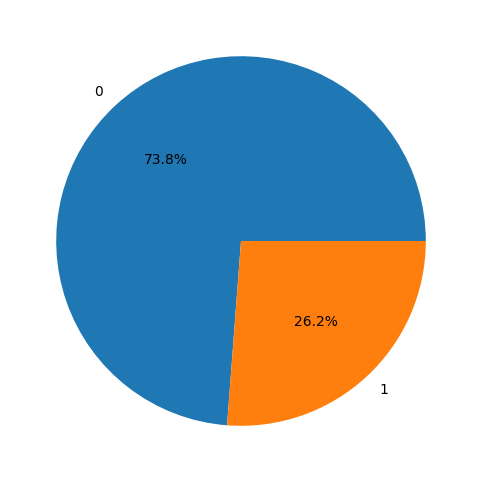

In [ ]:
target = data['Churn']
plt.figure(figsize=(6, 6))
plt.pie(target.value_counts(), labels=target.value_counts().index, autopct='%1.1f%%')
plt.show()



>  => классы не сбалансированы



Изменю на bool те фичи, которые содержат только Yes/No:

In [ ]:
yes_no = {'Yes': 1, 'No': 0}
for col in data.select_dtypes(include=['object']):
    if set(data[col].unique()).issubset(yes_no.keys()):
        data[col] = data[col].map(yes_no)
        test[col] = test[col].map(yes_no)

In [ ]:
bool_feat = [col for col in data.columns if data[col].isin([0, 1]).all()]
data[bool_feat] = data[bool_feat].astype(bool)

In [ ]:
bool_feat = [col for col in bool_feat if col != 'Churn']
test[bool_feat] = test[bool_feat].astype(bool)

In [ ]:
data.HasChild.dtypes

dtype('bool')

In [ ]:
data.HasInternetService.unique()

array(['No', 'Fiber optic', 'DSL'], dtype=object)

In [ ]:
 !pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 13.5 MB/s eta 0:00:00


interval columns not set, guessing: ['ClientPeriod', 'MonthlySpending', 'TotalSpent']


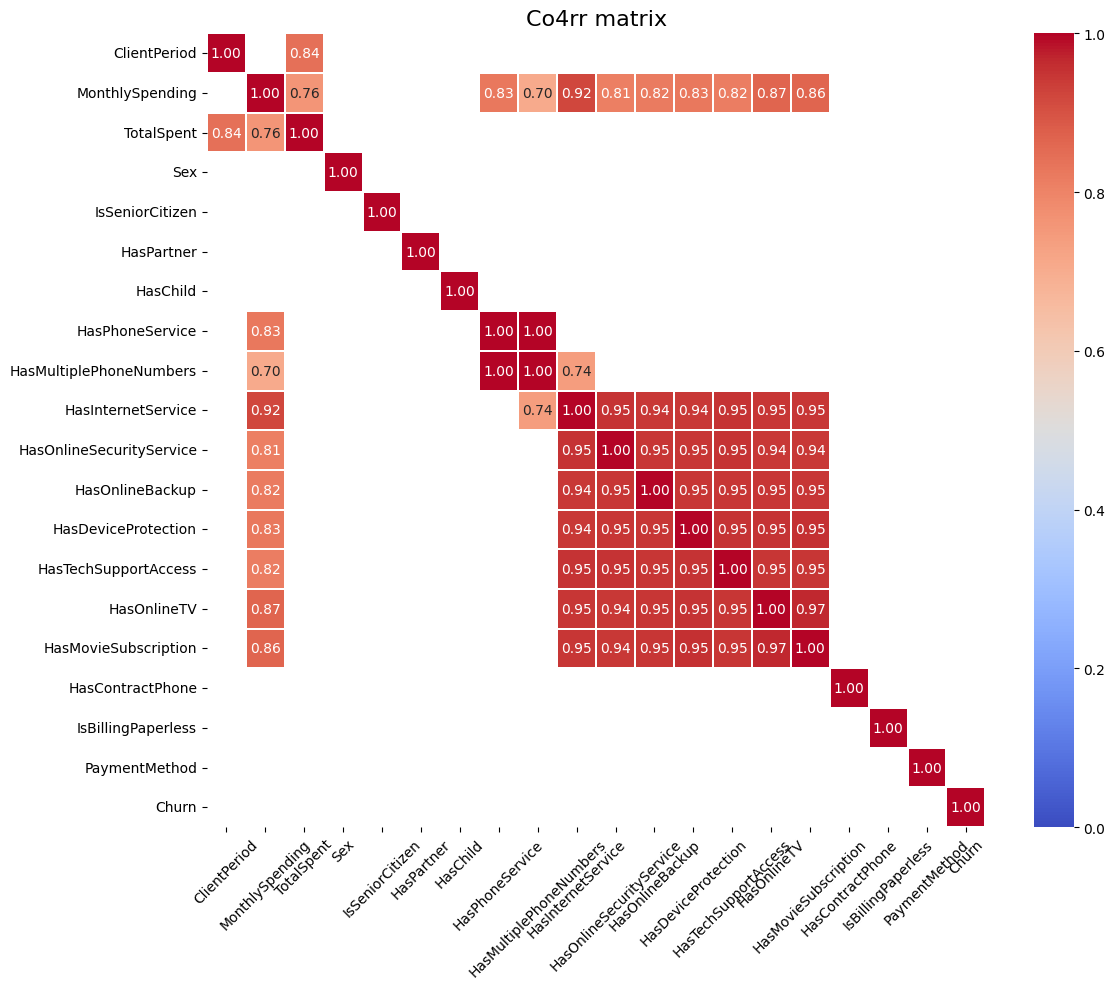

In [ ]:
import phik


corr_data = data.phik_matrix()

plt.figure(figsize=(12, 10))
corr_data_filtered = corr_data[abs(corr_data) > 0.7]

sns.heatmap(
    # corr_data,
    corr_data_filtered,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10},
    linewidths=0.2,
    vmin=0,
    vmax=1,
    center=0.5,
)

plt.title("Co4rr matrix", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

Видно, что группа услуг очень сильно коррелирует между собой.
Очень сильная корреляция между наличием нескольких номеров и наличием детей (=> дополнительные номера почти наверняка используются для детей).
Также очевидна корреляция между наличием услуг и месячной платой.

Посчитал нужным дропнуть признаки, очень сильно коррелирующие с месячной платой (порог 0.85), для использования в линейных моделях

In [ ]:
max_corr_val = 0.85

corr_features = corr_data.index[abs(corr_data.MonthlySpending) > max_corr_val].tolist()
corr_features.remove('MonthlySpending')

In [ ]:
corr_features

['HasInternetService', 'HasOnlineTV', 'HasMovieSubscription']

# Обучение

## Линейная модель


In [ ]:
data_lin = data.drop(columns=corr_features)
test_lin = test.drop(columns=corr_features)

In [ ]:
X_train_lin = data_lin.drop('Churn', axis=1)
y_train_lin = data_lin.Churn

# X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train_lin = y_train_lin.astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer

cat_f = X_train_lin.select_dtypes(include=['bool', 'object']).columns.tolist()
num_f = X_train_lin.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_transf = Pipeline(steps=[('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])

num_transf = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transf, cat_f),
    ('num', num_transf, num_f)])


regression_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', LogisticRegression(class_weight="balanced"))])

In [ ]:
c_grid = {'model__C': [100, 10, 1, 0.1, 0.01, 0.001]}

grid_search = GridSearchCV(regression_pipe, c_grid, cv=10, scoring='roc_auc', n_jobs=-1, refit=True)

grid_search.fit(X_train_lin, y_train_lin)

print(f"Best C: {grid_search.best_params_['model__C']}")
print(f"Best ROC-AUC: {grid_search.best_score_:.4f}")

Best C: 1
Best ROC-AUC: 0.8444


Best C: 1 \\
Best ROC-AUC: 0.8439

### Линейная модель с коррелирующими признаками

Посмотрим, что получилось бы, если коррелирующие признаки не были удалены:

In [ ]:
X_train_lin_2 = data.drop('Churn', axis=1)
y_train_lin_2 = data.Churn

In [ ]:
cat_f_2 = X_train_lin_2.select_dtypes(include=['bool', 'object']).columns.tolist()
num_f_2 = X_train_lin_2.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_transf_2 = Pipeline(steps=[('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])

num_transf_2 = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor_2 = ColumnTransformer(transformers=[
    ('cat', cat_transf_2, cat_f_2),
    ('num', num_transf_2, num_f_2)])


regression_pipe_2 = Pipeline(steps=[('preprocessor', preprocessor_2),
                            ('model', LogisticRegression(class_weight="balanced"))])

In [ ]:
grid_search_lin_2 = GridSearchCV(regression_pipe_2, c_grid, cv=5, scoring='roc_auc', n_jobs=-1, refit=True)

grid_search_lin_2.fit(X_train_lin_2, y_train_lin_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProt...
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent'])])),
                                       ('model',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1, param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [ ]:
print(f"Best C: {grid_search_lin_2.best_params_['model__C']}")
print(f"Best ROC-AUC: {grid_search_lin_2.best_score_:.4f}")

Best C: 100
Best ROC-AUC: 0.8448


Оказалось, что мы только усложнили себе жизнь, получили score больше: 0.8448 vs 0.8439 ☹

## Random forest

In [ ]:
X_train = data.drop('Churn', axis=1)
y_train = data.Churn

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('model', RandomForestClassifier(random_state=42))
])

rf_params = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf_pipe, rf_params, cv=10, scoring='roc_auc', n_jobs=-1, refit=True)
rf_grid.fit(X_train_lin_2, y_train_lin_2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDevicePro...
                                                                          'PaymentMethod']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10, 15],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [ ]:
print(f"Best params: {rf_grid.best_params_}")
print(f"Best ROC-AUC: {rf_grid.best_score_:.4f}")

Best params: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best ROC-AUC: 0.8435


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('model', KNeighborsClassifier())
])

knn_params = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

In [ ]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, scoring='roc_auc', n_jobs=-1, refit=True)
knn_grid.fit(X_train_lin_2, y_train_lin_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProt...
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent'])])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__metric': ['euclidean', 'manhattan'],
                         'model__n_neighbors': [3, 5, 7, 9],
                         'model__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [ ]:
print(f"Best params: {knn_grid.best_params_}")
print(f"Best ROC-AUC: {knn_grid.best_score_:.4f}")

Best params: {'model__metric': 'manhattan', 'model__n_neighbors': 9, 'model__weights': 'uniform'}
Best ROC-AUC: 0.8090


## Градиентный бустинг



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.0 MB/s eta 0:00:00


In [ ]:
X_train = data.drop('Churn', axis=1)
y_train = data.Churn

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from catboost import CatBoostClassifier

standart settings:

In [ ]:
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

cat_feat = X_train_0.select_dtypes(include=['object', 'bool']).columns.tolist()
X_train_0[cat_feat] = X_train_0[cat_feat].astype(str)

model_0 = CatBoostClassifier(cat_features=cat_feat,
                         logging_level="Silent",
                         eval_metric='AUC:hints=skip_train~false')

model_0.fit(X_train_0, y_train_0)

In [ ]:
y_pred_proba = model_0.predict_proba(X_valid_0)[:, 1]


roc_auc = roc_auc_score(y_valid_0, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.8234


RandomizedSearchCV:

In [ ]:
params = {'depth': np.arange(2, 8),
          'l2_leaf_reg': np.arange(0.1, 2, 0.5),
          'learning_rate':np.arange(0.01, 0.5, 0.01),
          'n_estimators': np.arange(300, 1000, 200),
          'min_data_in_leaf': np.arange(100, 1001, 100),
         }

cat_feat = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
X_train[cat_feat] = X_train[cat_feat].astype(str)

cat = CatBoostClassifier(cat_features=cat_feat,
                         logging_level="Silent",
                         eval_metric='AUC:hints=skip_train~false')

grid_search = RandomizedSearchCV(cat,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 cv=5,
                                 random_state=42,
                                 refit=True,
                                 n_jobs=-1)

cat_cv = grid_search.fit(X_train, y_train)

In [ ]:
print(f"best score: {cat_cv.best_score_}")
print(f"best params: {cat_cv.best_params_}")

best score: 0.8446336660746784
best params: {'n_estimators': 500, 'min_data_in_leaf': 700, 'learning_rate': 0.09999999999999999, 'l2_leaf_reg': 1.6, 'depth': 2}


## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

# meta = CatBoostClassifier(
#     logging_level='Silent',
#     eval_metric="AUC:hints=skip_train~false",
#     metric_period=1000,
#     random_seed=0,
#     grow_policy="Depthwise",
#     l2_leaf_reg=1,
#     learning_rate=0.08,
#     max_depth=10,
#     min_data_in_leaf=10,
#     n_estimators=10,
#     random_strength=11,
#     subsample=0.1,
# )
# cat_best = grid_search.best_estimator_

stack_model = StackingClassifier(
    estimators=[
        # ("logreg", grid_search_lin_2.best_estimator_),
        ('knn', knn_grid.best_estimator_),
        ('rf', rf_grid.best_estimator_),
        ('catboost', grid_search.best_estimator_)
    ],
    final_estimator=LogisticRegression(),
    # final_estimator=meta,
    cv=5,
    n_jobs=-1
)

stack_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('logreg',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(transformers=[('cat',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(drop='first',
                                                                                                                 handle_unknown='ignore'))]),
                                                                                  ['Sex',
                                                                                   'IsSeniorCitizen',
                                                                                   'HasPartner',
                                                                                   'HasChild',
                                                                                   'HasPhoneService',
                                                                                   'HasMultiplePhoneNumbers',
                                                                                   'HasInternetService',
                                                                                   'HasOnlineSecurityService',
                                                                                   'HasOnlineBack...
                                                                                   'IsBillingPaperless',
                                                                                   'PaymentMethod']),
                                                                                 ('num',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['ClientPeriod',
                                                                                   'MonthlySpending',
                                                                                   'TotalSpent'])])),
                                                ('model',
                                                 RandomForestClassifier(max_depth=10,
                                                                        min_samples_leaf=4,
                                                                        n_estimators=300,
                                                                        random_state=42))])),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7d4f6585fe10>)],
                   final_estimator=LogisticRegression(), n_jobs=-1)

# Предсказания

In [ ]:
test_2 = test.copy()

In [ ]:
test[cat_feat] = test[cat_feat].astype(str)

In [ ]:
# test_preds = grid_search.best_estimator_.predict(test) #сначала
test_preds = grid_search.best_estimator_.predict_proba(test)[:, 1]
submission = pd.DataFrame({'id': test.index, 'Churn': test_preds})
submission.to_csv('my_submission.csv', index=False)

In [ ]:
submission.shape

(1761, 2)

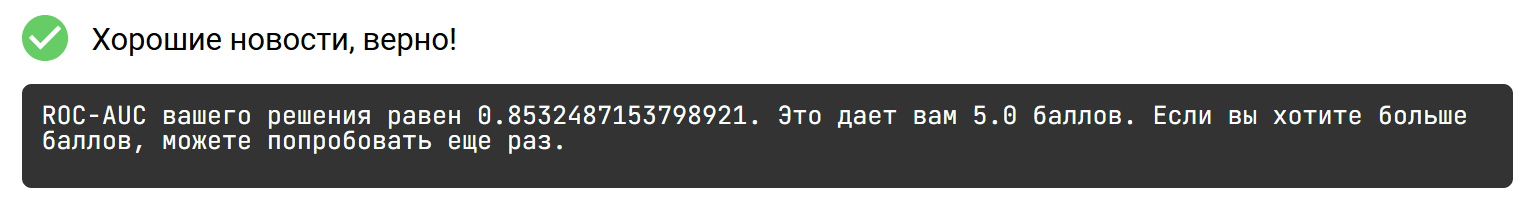

Предсказания со стекингом:

In [ ]:
test[cat_f_2] = test[cat_f_2].astype(str)

test_preds = stack_model.predict_proba(test)[:, 1]

submission_st = pd.DataFrame({'id': test.index, 'Churn': test_preds})
submission_st.to_csv('stacking_submission.csv', index=False)

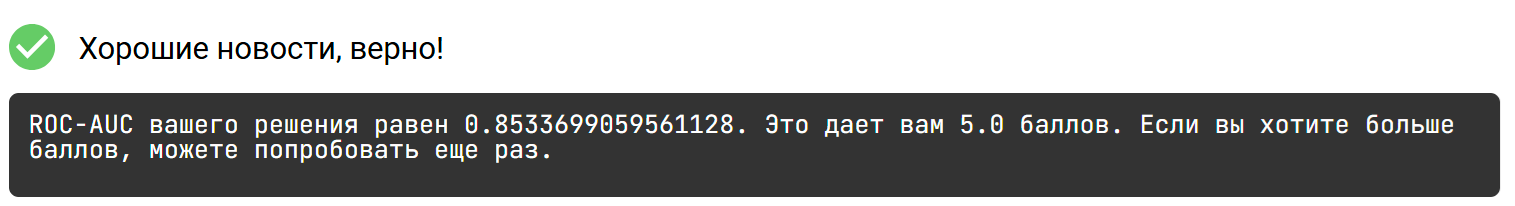